In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

import gsw as sw
from mpl_toolkits.basemap import Basemap, cm, interp

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def distance(data):
    distances = pd.DataFrame()    
    # calculate distance in km between points
    data['dx'] = np.insert(sw.distance(data['Lon'].values, data['Lat'].values, 0),0,0)/1000
    data['x'] = np.cumsum(data['dx'])

    return data  


In [3]:
# import data

KM = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/KM1314_vSept16.csv', sep = ',')
KM['density'] = sw.rho(KM['S'].values,KM['T'].values,0)
KM = distance(KM)
KM = KM.dropna().reset_index(drop = True)

ST = pd.read_csv(r'/Users/sclayton/Google Drive/o2ar_data/STUD08_vSept16.csv', sep = ',')
ST['density'] = sw.rho(ST['S'].values,ST['T'].values,0)
ST = distance(ST)
ST = ST.dropna().reset_index(drop = True)

print ST.columns

Index([u'Timestamp', u'Lat', u'Lon', u'S', u'T', u'Fluo (calibrated)',
       u'TrueO2Ar', u'O2Arsat', u'O2Arbiosat', u'MLD (WOA13)', u'Wkn',
       u'Air-sea flux', u'density', u'dx', u'x'],
      dtype='object')


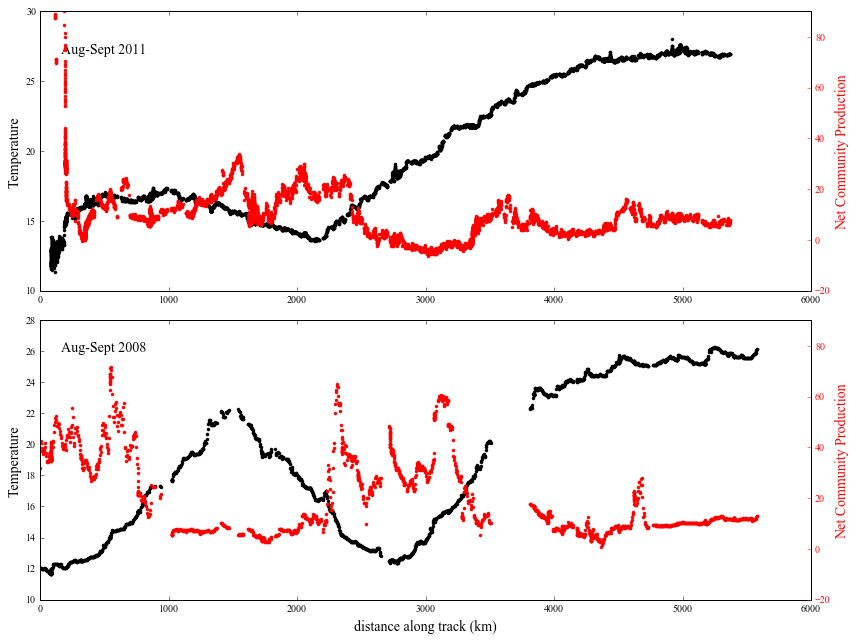

In [10]:
fig2, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 9), dpi = 300)

ax1.plot(KM['x'], KM['T'], '.k')
ax4 = ax1.twinx()
ax4.plot(KM['x'], KM['Air-sea flux'], '.r')
#ax1.set_xlim([140, 170])
#ax1.set_ylim([5, 25])
ax4.set_ylim([-20, 90])
ax1.text(165, 27,'Aug-Sept 2011', fontsize = 14)

ax1.set_ylabel('Temperature', color='k', fontsize = 14)
ax4.set_ylabel('Net Community Production', color= 'r', fontsize = 14)
ax4.tick_params(colors='r')

ax2.plot(ST['x'], ST['T'], '.k')
ax5 = ax2.twinx()
ax5.plot(ST['x'], ST['Air-sea flux'], '.r')
#ax2.set_xlim([140, 170])
#ax2.set_ylim([15, 30])
ax5.set_ylim([-20, 90])
ax2.text(165, 26,'Aug-Sept 2008', fontsize = 14)

ax2.set_ylabel('Temperature', color='k', fontsize = 14)
ax5.set_ylabel('Net Community Production', color= 'r', fontsize = 14)
ax5.tick_params(colors='r')

ax2.set_xlabel('distance along track (km)', fontsize = 14)

plt.show()

# fig2.savefig('../figures/uway_NCP_sst_east.png', dpi = 300)